In [16]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
import myUtils as utils

rootPath = "../../results/scenario/battery"
pathTail = "/networks/base_s_27_3H_3H_2045.nc"



plt.style.use('bmh')
%matplotlib inline

nBase = pypsa.Network(f"../../results/scenario/base{pathTail}")
nMean = pypsa.Network(f"{rootPath}_mean/{pathTail}")
nGood = pypsa.Network(f"{rootPath}_good/{pathTail}")
nBest = pypsa.Network(f"{rootPath}_best/{pathTail}")

networks = {
  # "Basis": nBase,
  "Mittleres": nMean,
  "Optimistisches": nGood,
  "Sehr optimistisches": nBest
}

INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base_s_27_3H_3H_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [30]:
import pandas as pd
import myUtils as utils
import importlib
importlib.reload(utils)

df = pd.DataFrame()
for key, n in networks.items():
  s = pd.Series()
  batteryStore = utils.getNByGroup(n, 'Store', utils.de_battery_store)
  homeBatteryStore = utils.getNByGroup(n, 'Store', utils.de_home_battery_store)

  batteryDispatch = utils.getNByGroup(n, 'Link', utils.de_battery_discharger)
  de_home_battery_discharger = utils.getNByGroup(n, 'Link', utils.de_home_battery_discharger)

  batteryDispatchP1 = -utils.getNTimePropByGroup(n, 'Link', 'p1', utils.de_battery_discharger) * 3
  homeBatteryDispatchP1 = -utils.getNTimePropByGroup(n, 'Link', 'p1', utils.de_home_battery_discharger) * 3
  
  s['Home Battery CAPEX'] = n.statistics.capex(groupby='de_home_battery_store').sum() / 1e9
  s['Battery CAPEX'] = n.statistics.capex(groupby='de_battery_store').sum() / 1e9
  s['Heimbatteriekapazität'] = homeBatteryStore.e_nom_opt.sum() / 1e3
  s['Batteriekapazität'] = batteryStore.e_nom_opt.sum() / 1e3
  
  s['Heimbatterieentladeleistung'] = de_home_battery_discharger.p_nom_opt.sum() / 1e3
  s['Batterieentladeleistung'] = batteryDispatch.p_nom_opt.sum() / 1e3

  
  s['Heimbatterieentladungsmenge'] = homeBatteryDispatchP1.sum().sum() / 1e6
  s['Batterieentladungsmenge'] = batteryDispatchP1.sum().sum() / 1e6

  df[key] = s

df.insert(0, 'unit', ['Mrd.EUR', 'Mrd.EUR','GWH', 'GWH', 'GW', 'GW', 'TWH', 'TWH'])
print(utils.dataframe_to_table(df))

  [Home Battery CAPEX], [Mrd.EUR], [0,922], [1,049], [0,791],
  [Battery CAPEX], [Mrd.EUR], [1,913], [1,680], [1,749],
  [Heimbatteriekapazität], [GWH], [88,163], [128,807], [161,668],
  [Batteriekapazität], [GWH], [265,451], [270,020], [519,133],
  [Heimbatterieentladeleistung], [GW], [19,566], [24,801], [29,137],
  [Batterieentladeleistung], [GW], [32,067], [32,796], [45,039],
  [Heimbatterieentladungsmenge], [TWH], [27,415], [35,823], [39,498],
  [Batterieentladungsmenge], [TWH], [52,737], [48,462], [60,293],


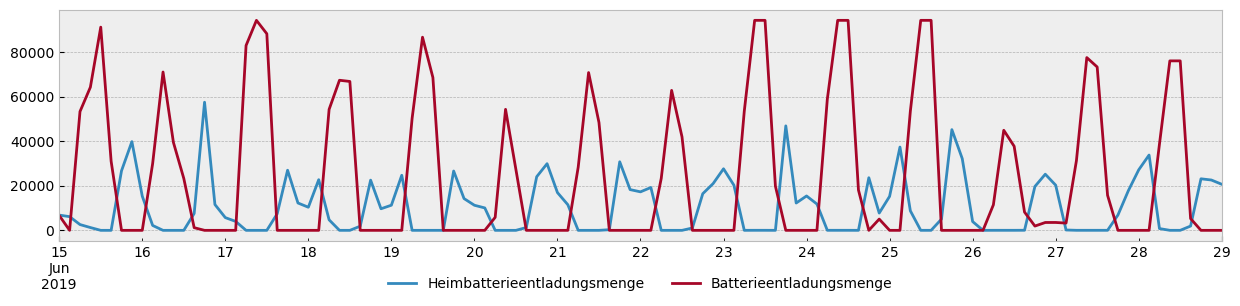

In [37]:
df = pd.DataFrame()

batteryDispatchP1 = -utils.getNTimePropByGroup(nMean, 'Link', 'p1', utils.de_battery_discharger) * 3
homeBatteryDispatchP1 = -utils.getNTimePropByGroup(nMean, 'Link', 'p1', utils.de_home_battery_discharger) * 3

df['Heimbatterieentladungsmenge'] = homeBatteryDispatchP1.sum(axis=1)
df['Batterieentladungsmenge'] = batteryDispatchP1.sum(axis=1)

ax = df['2019-1-15 00:00:00': '2019-1-29 00:00:00'].plot(figsize=(15,3))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)
ax.set_xlabel('')

plt.show()
